# Quantum Fourier Transform

https://en.wikipedia.org/wiki/Quantum_Fourier_transform

## Imports

In [1]:
%matplotlib inline

In [2]:
from sympy import init_printing
init_printing(use_latex=True)

In [3]:
from ipywidgets import interact, interactive
from IPython.display import clear_output, display, HTML, Audio

In [4]:
from sympy import sqrt, symbols, Rational
from sympy import expand, Eq, Symbol, simplify, exp, sin
from sympy.physics.quantum import *
from sympy.physics.quantum.qubit import *
from sympy.physics.quantum.gate import *
from sympy.physics.quantum.grover import *
from sympy.physics.quantum.qft import QFT, IQFT, Fourier
from sympy.physics.quantum.circuitplot import circuit_plot

## QFT Gate and Circuit

The Quantum Fourier Transform (QFT) is useful for a quantum algorithm for factoring numbers which is exponentially faster than what is thought to be possible on a classical machine. The transform does a DFT on the state of a quantum system. There is a simple decomposition of the QFT in terms of a few elementary gates.

Build a 3 qubit QFT and decompose it into primitive gates:

In [5]:
from sympy import sqrt, symbols, Rational
from sympy import expand, Eq, Symbol, simplify, exp, sin
from sympy.physics.quantum import *
from sympy.physics.quantum.qubit import *
from sympy.physics.quantum.gate import *
from sympy.physics.quantum.grover import *
from sympy.physics.quantum.qft import QFT, IQFT, Fourier
from sympy.physics.quantum.circuitplot import circuit_plot

SWAP   ⋅H ⋅C ⎛S ⎞⋅H ⋅C ⎛T ⎞⋅C ⎛S ⎞⋅H 
    0,2  0  0⎝ 1⎠  1  0⎝ 2⎠  1⎝ 2⎠  2

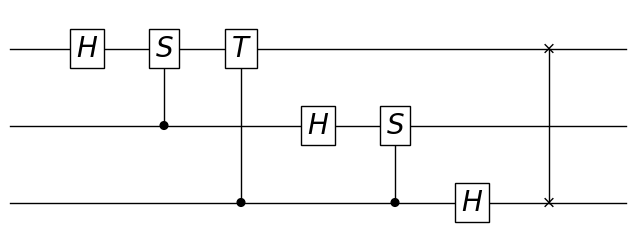

In [6]:
circuit_plot(fourier, nqubits=3);

In [7]:
def plot_qft(n):
    circuit_plot(QFT(0,n).decompose(), nqubits=n)

In [8]:
interact(plot_qft, n=(2,8));

interactive(children=(IntSlider(value=5, description='n', max=8, min=2), Output()), _dom_classes=('widget-inte…

The QFT circuit can be represented in various symbolic forms.

In [9]:
m = represent(QFT(0,3), nqubits=3)
m

⎡√2      √2         √2        √2        √2       √2         √2        √2     ⎤
⎢──      ──         ──        ──        ──       ──         ──        ──     ⎥
⎢4       4          4         4         4        4          4         4      ⎥
⎢                                                                            ⎥
⎢          ⅈ⋅π                 3⋅ⅈ⋅π             -3⋅ⅈ⋅π                -ⅈ⋅π  ⎥
⎢          ───                 ─────             ───────               ───── ⎥
⎢           4                    4                  4                    4   ⎥
⎢√2    √2⋅ℯ        √2⋅ⅈ    √2⋅ℯ        -√2   √2⋅ℯ         -√2⋅ⅈ    √2⋅ℯ      ⎥
⎢──    ───────     ────    ─────────   ────  ───────────  ──────   ───────── ⎥
⎢4        4         4          4        4         4         4          4     ⎥
⎢                                                                            ⎥
⎢√2     √2⋅ⅈ       -√2      -√2⋅ⅈ       √2      √2⋅ⅈ       -√2      -√2⋅ⅈ    ⎥
⎢──     ────       ────     ──────      ──      ────

In [10]:
represent(Fourier(0,3), nqubits=3)*4/sqrt(2)

⎡1  1   1   1   1   1   1   1 ⎤
⎢                             ⎥
⎢        2   3   4   5   6   7⎥
⎢1  ω   ω   ω   ω   ω   ω   ω ⎥
⎢                             ⎥
⎢    2   4   6       2   4   6⎥
⎢1  ω   ω   ω   1   ω   ω   ω ⎥
⎢                             ⎥
⎢    3   6       4   7   2   5⎥
⎢1  ω   ω   ω   ω   ω   ω   ω ⎥
⎢                             ⎥
⎢    4       4       4       4⎥
⎢1  ω   1   ω   1   ω   1   ω ⎥
⎢                             ⎥
⎢    5   2   7   4       6   3⎥
⎢1  ω   ω   ω   ω   ω   ω   ω ⎥
⎢                             ⎥
⎢    6   4   2       6   4   2⎥
⎢1  ω   ω   ω   1   ω   ω   ω ⎥
⎢                             ⎥
⎢    7   6   5   4   3   2    ⎥
⎣1  ω   ω   ω   ω   ω   ω   ω ⎦

## QFT in action

Build a 3 qubit state to take the QFT of:

In [11]:
state = (Qubit('000') + Qubit('010') + Qubit('100') + Qubit('110'))/sqrt(4)
state

Perform the QFT:

In [12]:
qapply(fourier*state)

In [13]:
def apply_qft(n):
    state = Qubit(IntQubit(n, 3))
    result = qapply(QFT(0,3).decompose()*state)
    display(state)
    display(result)

In [14]:
interact(apply_qft, n=(0,7));

interactive(children=(IntSlider(value=3, description='n', max=7), Output()), _dom_classes=('widget-interact',)…